In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('/content/Coursera.csv')
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [11]:
np.unique(data['Course Name'])

array(['"Making" Progress Teach-Out',
       '(Non) Status quo Attitudes with NetLogo',
       '1E Test: How Computers Work', ...,
       'iOS Project: Transreality Game', 'iPad Music Player in XD',
       'idea 2 IMPACT: An Introduction to Translating Assistive Health Technologies and Other Products'],
      dtype=object)

In [7]:
np.shape(data)

(3522, 7)

In [8]:
# Remove rows containing NaN values
data = data.dropna()
np.shape(data)

(3522, 7)

In [9]:
summary_stats = data.describe()
print(summary_stats)

                                              Course Name  \
count                                                3522   
unique                                               3416   
top     Google Cloud Platform Fundamentals: Core Infra...   
freq                                                    8   

                      University Difficulty Level Course Rating  \
count                       3522             3522          3522   
unique                       184                5            31   
top     Coursera Project Network         Beginner           4.7   
freq                         562             1444           740   

                                             Course URL  \
count                                              3522   
unique                                             3424   
top     https://www.coursera.org/learn/gcp-fundamentals   
freq                                                  8   

                                       Course Description  \
c

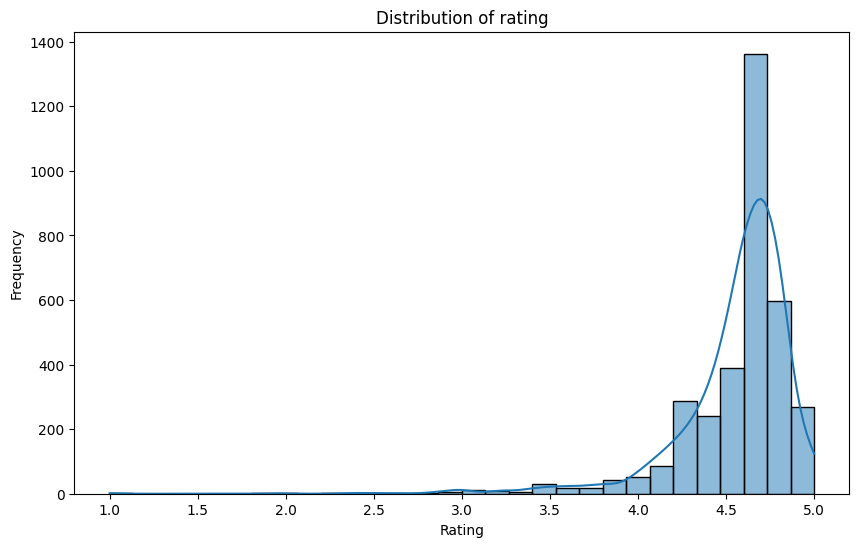

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'price' is the column containing prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Course Rating'], bins=30, kde=True)
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


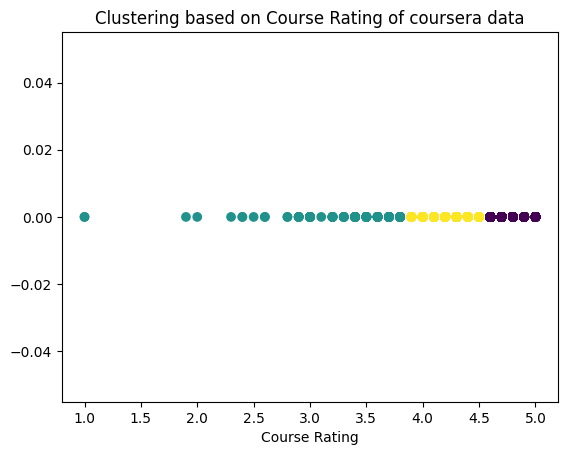

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the 'course_rating' column
scaler = StandardScaler()
data['Course Rating'] = pd.to_numeric(data['Course Rating'], errors='coerce')
# data['Course Rating'] = data['Course Rating'].astype(float)
data = data.dropna()
data['scaled_rating'] = scaler.fit_transform(data[['Course Rating']])

# Choose the number of clusters (k)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['scaled_rating']])

# Display the clustered DataFrame
# print(df)

# Visualize the clusters
plt.scatter(data['Course Rating'], [0] * len(data), c=data['cluster'], cmap='viridis')
plt.xlabel('Course Rating')
plt.title('Clustering based on Course Rating of coursera data')
plt.show()

Text(0.5, 1.0, 'DBSCAN Clustering of coursera data')

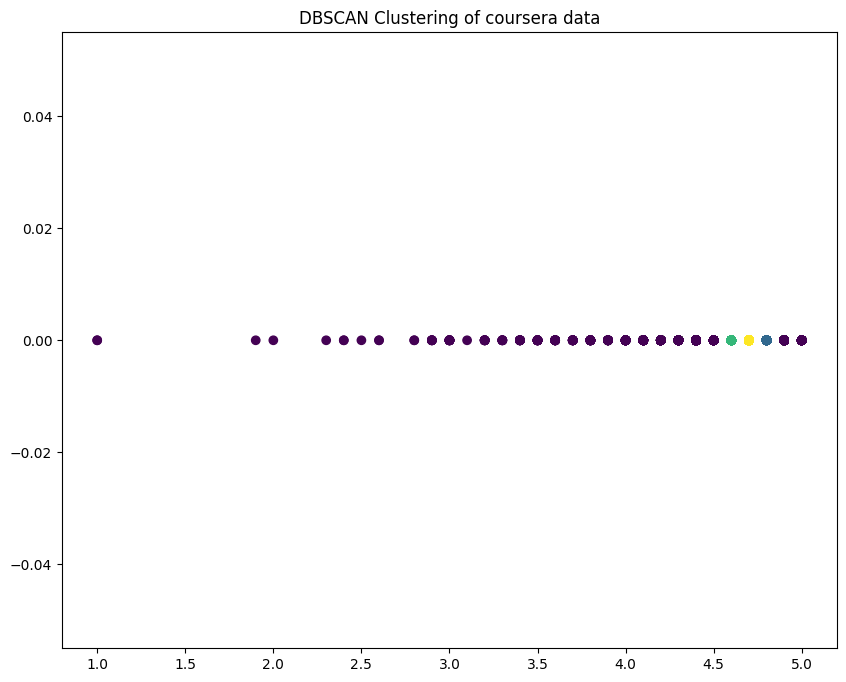

In [24]:
from sklearn.cluster import DBSCAN


# Apply DBSCAN clustering
eps = 0.01  # Adjust this parameter based on the density of your data
min_samples = 400  # Adjust this parameter based on the minimum points required in a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['scaled_rating']])

# Visualize the clusters on a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data['Course Rating'], [0] * len(data), c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of coursera data')
# plt.xlabel('Latitude')